Capstone

# import data

In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import pandas as pd
df = pd.read_csv('data/WBDevelopmentIndicators.csv')
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,81.844982,82.407647,82.827636,83.169227,83.587141,83.954293,84.230630,84.570425,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,85.189815,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,73.530494,74.543489,75.770972,76.772916,78.839139,77.487377,78.564439,78.958780,NaN,NaN


In [3]:
df_long = pd.melt(df, id_vars=df.columns[:4], var_name="Year")
df_long.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,value
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,1960,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,1960,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,1960,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,1960,NaN


In [4]:
df_long.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,value
24906019,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.NEGL.ZS,2018,NaN
24906020,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.REFU.ZS,2018,NaN
24906021,Zimbabwe,ZWE,Women who were first married by age 15 (% of w...,SP.M15.2024.FE.ZS,2018,NaN
24906022,Zimbabwe,ZWE,Women who were first married by age 18 (% of w...,SP.M18.2024.FE.ZS,2018,NaN
24906023,Zimbabwe,ZWE,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS,2018,NaN


In [5]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24906024 entries, 0 to 24906023
Data columns (total 6 columns):
Country Name      object
Country Code      object
Indicator Name    object
Indicator Code    object
Year              object
value             float64
dtypes: float64(1), object(5)
memory usage: 1.1+ GB


In [6]:
df_long.isna().sum()

Country Name             0
Country Code             0
Indicator Name           0
Indicator Code           0
Year                     0
value             16642966
dtype: int64

# EDA

What is the range of years?

In [7]:

print(min(df_long["Year"])," to ",max(df_long["Year"]))

1960  to  2018


How many unique countries and groups of countries are there?

In [8]:
df_long["Indicator Code"].nunique()

1599

Let's pick a country and an indicator to explore

In [9]:
# select birth rate (per 1,000 people) in for the United States
select_indicator = 'SP.DYN.CBRT.IN'
select_country = 'USA'

mask1 = df_long['Indicator Code'].str.contains(select_indicator) 
mask2 = df_long['Country Code'].str.contains(select_country)

# stage is just those indicators matching the USA for country code and birthrate indicator.
stage = df_long[mask1 & mask2]

In [10]:
stage.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,value
23200025,United States,USA,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2014,12.5
23622161,United States,USA,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2015,12.4
24044297,United States,USA,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2016,12.2
24466433,United States,USA,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2017,11.8
24888569,United States,USA,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2018,NaN


Plot birth rate over time with Seaborn

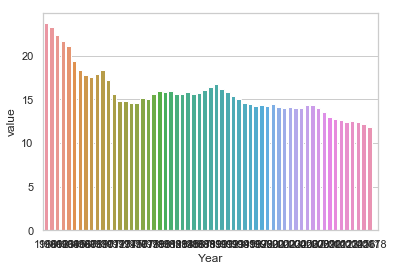

In [11]:
sns.set(style="whitegrid")
ax = sns.barplot(x='Year', y='value', data=stage)


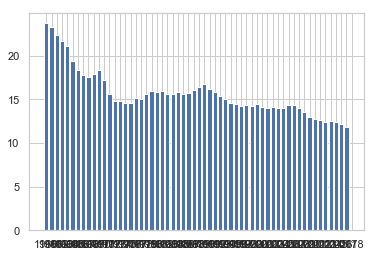

In [12]:
# get the years
years = stage['Year'].values
# get the values 
birthrate = stage['value'].values

# create
plt.bar(years,birthrate)
plt.show()

In [13]:
df_birthrate = df_long[df_long['Indicator Code'] == "SP.DYN.CBRT.IN"]
df_birthrate.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,value
134,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,47.689955
1733,Caribbean small states,CSS,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,40.307514
3332,Central Europe and the Baltics,CEB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,19.117434
4931,Early-demographic dividend,EAR,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,43.627366
6530,East Asia & Pacific,EAS,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,26.279564


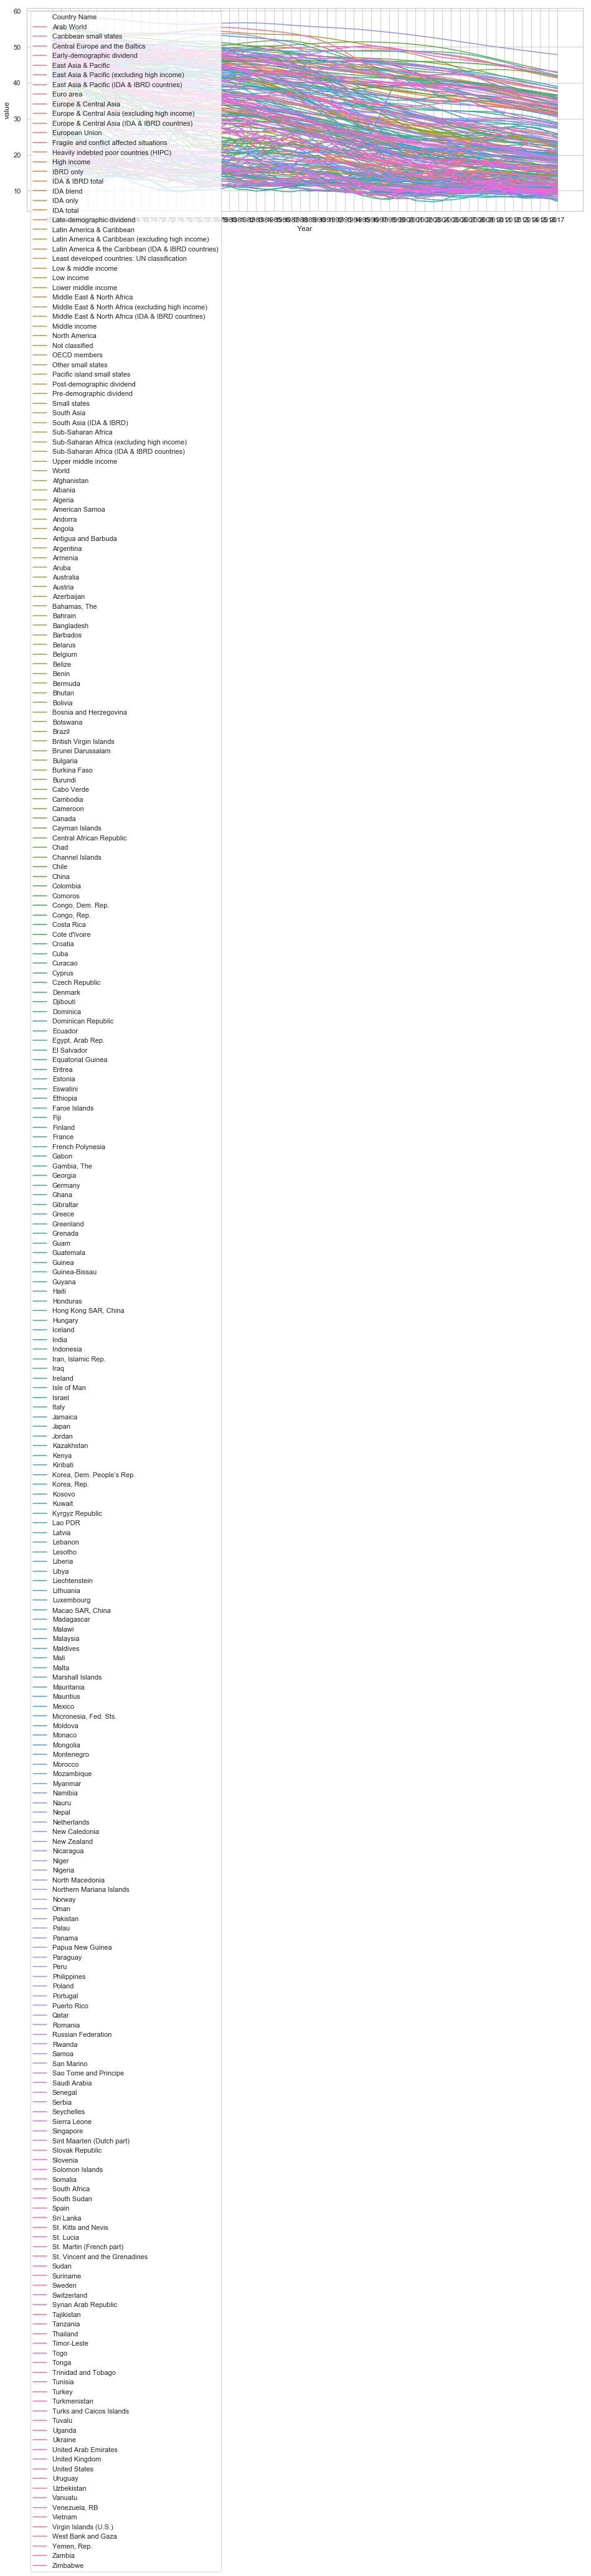

In [14]:

plt.figure(figsize=(16, 6))
ax = sns.lineplot(x="Year", y="value", data=df_birthrate, hue="Country Name")

## Indicators of Interest

- Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care  (% of women age 15-49)	SG.DMK.SRCR.FN.ZS
- Women participating in the three decisions (own health care, major household purchases, and visiting family) (% of women age 15-49)	SG.DMK.ALLD.FN.ZS
- Women who believe a husband is justified in beating his wife (any of five reasons) (%)	SG.VAW.REAS.ZS
- Law prohibits or invalidates child or early marriage (1=yes; 0=no)	SG.LAW.CHMR
- Life expectancy at birth, female (years)	SP.DYN.LE00.FE.IN
- Legislation exists on domestic violence (1=yes; 0=no)	SG.LEG.DVAW
- Lifetime risk of maternal death (%)	SH.MMR.RISK.ZS
- Contributing family workers, female (% of female employment) (modeled ILO estimate)	SL.FAM.WORK.FE.ZS
- Children out of school (% of primary school age)	SE.PRM.UNER.ZS
- Children out of school, female (% of female primary school age)	SE.PRM.UNER.FE.ZS
- Adolescents out of school (% of lower secondary school age)	SE.SEC.UNER.LO.ZS
- Adolescents out of school, female (% of female lower secondary school age)	SE.SEC.UNER.LO.FE.ZS
- Wage and salaried workers, female (% of female employment) (modeled ILO estimate)	SL.EMP.WORK.FE.ZS
- Mortality rate, infant (per 1,000 live births)	SP.DYN.IMRT.IN
- Maternal mortality ratio (modeled estimate, per 100,000 live births)	SH.STA.MMRT

In [23]:
#how to select multiple indicators?

df_gender = df_long[df_long['Indicator Code'] == 'SP.DYN.CBRT.IN', 'SH.STA.MMRT.NE']


TypeError: 'Series' objects are mutable, thus they cannot be hashed

# Preprocessing & Feature Engineering

# K Means Model

## Implement K-means Clustering in scikit-learn

In [11]:
#starter code from curriculum

In [ ]:
from sklearn.cluster import KMeans

# Set number of clusters at initialization time
k_means = KMeans(n_clusters=3) 

# Run the clustering algorithm
k_means.fit(some_df) 

# Generate cluster index values for each row
cluster_assignments = k_means.predict(some_df) 

# Cluster predictions for each point are also stored in k_means.labels_

In [ ]:
k_means = KMeans(n_clusters = 7) #create a k means object and set n_clusters to the number you want to start with
k_means.fit(X) #fit the k means object to the data stored in X
y_hat = k_means.predict(X) # generate cluster predictions with k_means and store the results in y_hat

In [ ]:
#visualize the k-means clusters
plt.scatter(X[:, 0], X[:, 1], c = y_hat, s = 25)
cl_centers = k_means.cluster_centers_
plt.scatter(cl_centers[:, 0], cl_centers[:, 1], c='black', s=100);

## Evaluating Cluster Fitness

### Calinski Harabasz Score (AKA Variance Ratio)

The variance ratio is a ratio of the variance of the points within a cluster, to the variance of a point to points in other clusters. We want intra-cluster variance to be low (suggesting that the clusters are tightly knit), and inter-cluster variance to be high (suggesting that there is little to no ambiguity about which cluster the points belong to). So, higher CH score means the model has better defined clusters.

When you have k clusters, the score s is a ratio of the between-cluster dispersion, and the within-cluster dispersion.

$$ s(k) = \dfrac{Tr(B_k)}{Tr(W_k)}\times \dfrac{N-k}{k-1}$$

Here, the between group dispersion matrix is $B_k$ and the withing dispersion matrix is $W_k$:

$$W_k = \sum^k_{q=1} \sum_{x\in C_q} (x - c_q)(x-c_q)^T$$ $$B_k = \sum_{q} n_q (c_q - c)(c_q-c)^T$$

where

- $N$ is the data size
- $C_q$ represents the samples in cluster $q$
- $c_q$ represents the center of cluster $q$
- $c$ the center of $E$
- $n_q$ the number of samples in cluster $q$.

In [ ]:
from sklearn.metrics import calinski_harabasz_score

# Note that we could also pass in k_means.labels_ instead of cluster_assignments
print(calinski_harabasz_score(some_df, cluster_assignments))

In [ ]:
#lab example

metrics.calinski_harabaz_score(X, labels)

### Silhouette Score is another metric used to evaluate cluster fit

If the actual cluster labels are unknown, the model itself must be used for evaluation. When calculating the Silhouette Coefficient, a higher score means that you ended up with a model with better defined clusters. Two scores are used to generate the silhouette coefficient:

- a is the average distance between one data sample and all other points in the same cluster
- b The average distance between one data sample and all other points in the next nearest cluster.

$$ s = \dfrac{(b-a)}{max(b-a)} $$



In [ ]:
from sklearn import metrics
labels = k_means.labels_ #store the labels_ from the model in the labels variable

metrics.silhouette_score(X, labels, metric='euclidean') #call the silhouette_score() 
#function from the metrics module. Pass in teh data X, labels, and set the metric parameter equal to euclidean

# Hierarchical Agglomerative Clustering - don't have to have # of clusters pre-determined

# K Nearest Neighbors Model (maybe after unsupervised models)

## Create training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.25, random_state=42)

## Normalize the data

In [ ]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=df.columns)
scaled_df_train.head()

## Fit a KNN model

In [ ]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier()

# Fit the classifier
clf.fit(scaled_data_train, y_train)

# Predict on the test set
test_preds = clf.predict(scaled_data_test)

## Evaluate the Model

In [ ]:
# Import the necessary functions
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [ ]:
# Complete the function
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)

## Improve model performance

# Practice/Unused Code

In [42]:
df['Indicator_Code'].nunique()


1599

In [8]:
df_electricity_grouped = df_electricity.groupby('Country Code')
df_electricity_grouped.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,value
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN
1602,Caribbean small states,CSS,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN
3201,Central Europe and the Baltics,CEB,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN
4800,Early-demographic dividend,EAR,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN
6399,East Asia & Pacific,EAS,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN
7998,East Asia & Pacific (excluding high income),EAP,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN
9597,East Asia & Pacific (IDA & IBRD countries),TEA,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN
11196,Euro area,EMU,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN
12795,Europe & Central Asia,ECS,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN
14394,Europe & Central Asia (excluding high income),ECA,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN


In [6]:
ChinaIndia_subset = df.query('Country_Name == "China" or Country_Name == "India"')
Electricity_subset = ChinaIndia_subset.query('Indicator_Code == "EG.ELC.ACCS.ZS"')
Electricity_subset.head()

,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
140715,China,CHN,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,99.115646,99.7,99.748726,99.916382,99.983116,99.998489,100.0,100.000000,NaN,NaN
217467,India,IND,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,75.000000,76.3,67.600000,79.900000,79.599113,81.239510,88.0,84.526817,NaN,NaN


In [7]:
Electricity_subset2 = Electricity_subset.drop(Electricity_subset.columns[[0,1,2,3]], axis=1).transpose()
Electricity_subset2.columns = ["China", "India"]
Electricity_subset2

,China,India
1960,NaN,NaN
1961,NaN,NaN
1962,NaN,NaN
1963,NaN,NaN
1964,NaN,NaN
1965,NaN,NaN
1966,NaN,NaN
1967,NaN,NaN
1968,NaN,NaN
1969,NaN,NaN


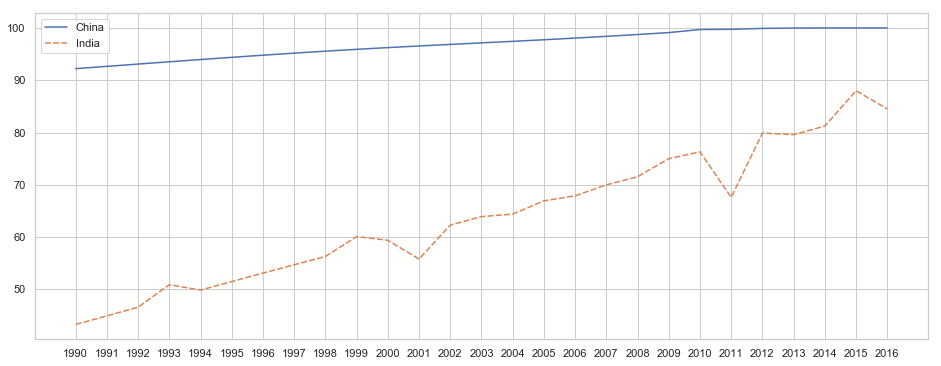

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))
ax = sns.lineplot(data=Electricity_subset2)

In [34]:
Electricity = df.query('Indicator_Code == "EG.ELC.ACCS.ZS"')
Electricity.head(2)

,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,85.189815,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,NaN,NaN
1602,Caribbean small states,CSS,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,92.368681,93.114511,92.677095,93.625323,94.672223,95.557923,95.568684,96.016309,NaN,NaN


In [35]:
Electricity.set_index('Country_Name')
Electricity.head()

,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,85.189815,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,NaN,NaN
1602,Caribbean small states,CSS,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,92.368681,93.114511,92.677095,93.625323,94.672223,95.557923,95.568684,96.016309,NaN,NaN
3201,Central Europe and the Baltics,CEB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN
4800,Early-demographic dividend,EAR,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,78.682380,79.455104,76.450537,82.264495,82.585641,83.534424,86.972615,86.751627,NaN,NaN
6399,East Asia & Pacific,EAS,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,94.988562,95.496184,95.818281,96.226282,96.446001,96.589744,96.872611,96.914214,NaN,NaN


In [36]:
Electricity = Electricity.drop(Electricity.columns[[1,2,3]], axis=1).transpose()
Electricity.head()

,3,1602,3201,4800,6399,7998,9597,11196,12795,14394,...,406149,407748,409347,410946,412545,414144,415743,417342,418941,420540
Country_Name,Arab World,Caribbean small states,Central Europe and the Baltics,Early-demographic dividend,East Asia & Pacific,East Asia & Pacific (excluding high income),East Asia & Pacific (IDA & IBRD countries),Euro area,Europe & Central Asia,Europe & Central Asia (excluding high income),...,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
new_header = Electricity.iloc[0] #grab the first row for the header
Electricity = Electricity[1:] #take the data less the header row
Electricity.columns = new_header #set the header row as the df header

Electricity.head()

Country_Name,Arab World,Caribbean small states,Central Europe and the Baltics,Early-demographic dividend,East Asia & Pacific,East Asia & Pacific (excluding high income),East Asia & Pacific (IDA & IBRD countries),Euro area,Europe & Central Asia,Europe & Central Asia (excluding high income),...,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
Electricity.columns = [column.replace(" ", "_") for column in Electricity.columns]

In [40]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))
ax = sns.lineplot(data=Electricity)

ValueError: These `style` levels are missing dashes: {'Uzbekistan', 'Vanuatu', 'South_Africa', 'Liberia', 'Chile', 'El_Salvador', 'Lao_PDR', 'Israel', 'Europe_&_Central_Asia', 'IDA_only', 'Djibouti', 'Egypt,_Arab_Rep.', 'Eritrea', 'Tonga', 'Romania', 'Pakistan', 'Algeria', 'Europe_&_Central_Asia_(IDA_&_IBRD_countries)', 'South_Asia_(IDA_&_IBRD)', 'Eswatini', 'Monaco', 'Late-demographic_dividend', 'Venezuela,_RB', 'Cameroon', 'Haiti', 'United_States', 'Latin_America_&_Caribbean_(excluding_high_income)', 'Nigeria', 'Antigua_and_Barbuda', 'Middle_East_&_North_Africa_(IDA_&_IBRD_countries)', 'Singapore', 'British_Virgin_Islands', 'Guyana', 'Sao_Tome_and_Principe', 'Sierra_Leone', 'St._Martin_(French_part)', 'Bhutan', 'Guatemala', 'Mali', 'Nepal', 'Cayman_Islands', 'Latin_America_&_the_Caribbean_(IDA_&_IBRD_countries)', 'Mauritius', 'Samoa', 'Estonia', 'Lithuania', 'Tajikistan', 'Gibraltar', 'Sudan', 'Post-demographic_dividend', 'San_Marino', 'New_Caledonia', 'Poland', 'Sub-Saharan_Africa', 'Syrian_Arab_Republic', 'Spain', 'Slovak_Republic', 'Channel_Islands', 'Bangladesh', 'Saudi_Arabia', 'Malta', 'Qatar', 'Austria', 'Switzerland', 'Canada', 'Cambodia', 'Trinidad_and_Tobago', 'Morocco', 'Denmark', 'Colombia', 'Albania', 'China', 'Luxembourg', 'South_Sudan', 'Isle_of_Man', 'Small_states', 'Japan', 'Hong_Kong_SAR,_China', 'Fiji', 'Zimbabwe', 'Heavily_indebted_poor_countries_(HIPC)', 'Guinea', 'Palau', 'Belgium', 'Costa_Rica', 'Latvia', 'Lebanon', 'Greenland', 'Slovenia', 'North_America', 'Norway', 'Cabo_Verde', 'Belarus', 'Not_classified', 'Cyprus', 'Sint_Maarten_(Dutch_part)', 'Jordan', 'Honduras', 'Mauritania', 'Pacific_island_small_states', "Cote_d'Ivoire", 'Least_developed_countries:_UN_classification', 'Marshall_Islands', 'St._Lucia', 'Malaysia', 'Sri_Lanka', 'Finland', 'Bulgaria', 'Jamaica', 'American_Samoa', 'Seychelles', 'Guam', 'Kazakhstan', 'Oman', 'Iran,_Islamic_Rep.', 'Sweden', 'Tunisia', 'Korea,_Rep.', 'Uganda', 'Czech_Republic', 'Senegal', 'Tanzania', 'St._Vincent_and_the_Grenadines', 'Bolivia', 'Hungary', 'Mozambique', 'Ecuador', 'Andorra', 'Liechtenstein', 'Fragile_and_conflict_affected_situations', 'St._Kitts_and_Nevis', 'Sub-Saharan_Africa_(IDA_&_IBRD_countries)', 'Pre-demographic_dividend', 'Northern_Mariana_Islands', 'IDA_total', 'Middle_income', 'Montenegro', 'IBRD_only', 'Bahamas,_The', 'Guinea-Bissau', 'IDA_&_IBRD_total', 'Malawi', 'Greece', 'Kenya', 'India', 'Aruba', 'Maldives', 'Euro_area', 'French_Polynesia', 'East_Asia_&_Pacific_(IDA_&_IBRD_countries)', 'Lesotho', 'Chad', 'Kiribati', 'Timor-Leste', 'Angola', 'Bahrain', 'Central_African_Republic', 'Azerbaijan', 'Serbia', 'Ghana', 'Croatia', 'Vietnam', 'Yemen,_Rep.', 'Kosovo', 'Rwanda', 'United_Arab_Emirates', 'Europe_&_Central_Asia_(excluding_high_income)', 'Libya', 'Netherlands', 'North_Macedonia', 'United_Kingdom', 'Botswana', 'Dominica', 'Italy', 'Russian_Federation', 'Turks_and_Caicos_Islands', 'Virgin_Islands_(U.S.)', 'Namibia', 'Somalia', 'Mongolia', 'Bermuda', 'Ireland', 'Dominican_Republic', 'Iceland', 'High_income', 'Argentina', 'Panama', 'Middle_East_&_North_Africa', 'Portugal', 'Mexico', 'Comoros', 'France', 'Gabon', 'Ethiopia', 'Afghanistan', 'Papua_New_Guinea', 'Indonesia', 'Macao_SAR,_China', 'Micronesia,_Fed._Sts.', 'Kyrgyz_Republic', 'Uruguay', 'Middle_East_&_North_Africa_(excluding_high_income)', 'Armenia', 'Solomon_Islands', 'Brunei_Darussalam', 'Iraq', 'Burundi', 'Moldova', 'Faroe_Islands', 'Sub-Saharan_Africa_(excluding_high_income)', 'Australia', 'Congo,_Dem._Rep.', 'Upper_middle_income', 'Myanmar', 'Philippines', 'Equatorial_Guinea', 'Barbados', 'Kuwait', 'Belize', 'Low_income', 'Paraguay', 'Brazil', 'West_Bank_and_Gaza', 'Bosnia_and_Herzegovina', 'Germany', 'Togo', 'South_Asia', 'Nicaragua', 'Thailand', 'Nauru', 'Other_small_states', 'Turkmenistan', 'Georgia', 'Tuvalu', 'New_Zealand', 'Niger', 'Zambia', 'Ukraine', 'Puerto_Rico', 'Gambia,_The', 'IDA_blend', 'Congo,_Rep.', 'Lower_middle_income', 'World', 'Turkey', 'European_Union', 'Low_&_middle_income', 'OECD_members', 'Korea,_Dem._People’s_Rep.', 'Grenada', 'Madagascar', 'Cuba', 'Suriname', 'Burkina_Faso', 'Benin', 'Curacao', 'Latin_America_&_Caribbean', 'Peru'}

<Figure size 1152x432 with 0 Axes>

In [8]:
df.columns = [column.replace(" ", "_") for column in df.columns]